In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell.compose(meas)
result = backend.run(transpile(circ, backend), shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'00': 501, '11': 499}


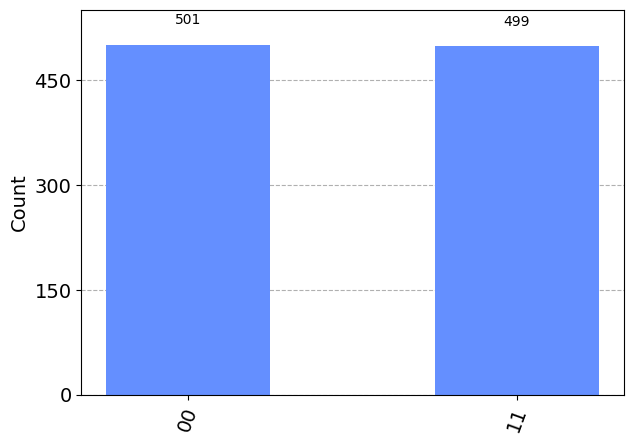

In [3]:
plot_histogram(counts)

## Options for when plotting a histogram

**legend:**: This is used to provide a label for the executions. It takes a list of strings used to label each execution’s results. This is mostly useful when plotting multiple execution results in the same histogram.

**sort**: This is used to adjust the order the bars in the histogram are rendered. It can be set to either ascending order with **asc** or descending order with **desc**. 

**number_to_keep**: This takes an integer for the number of terms to show, the rest are grouped together in a single bar called rest. 

**color**: This can either take a string or a list of strings for the colors to use for the bars for each execution.

**bar_labels**: This can adjust whether labels are printed above the bars or not.

**figsize**: This takes a tuple of the size in inches to make the output figure.

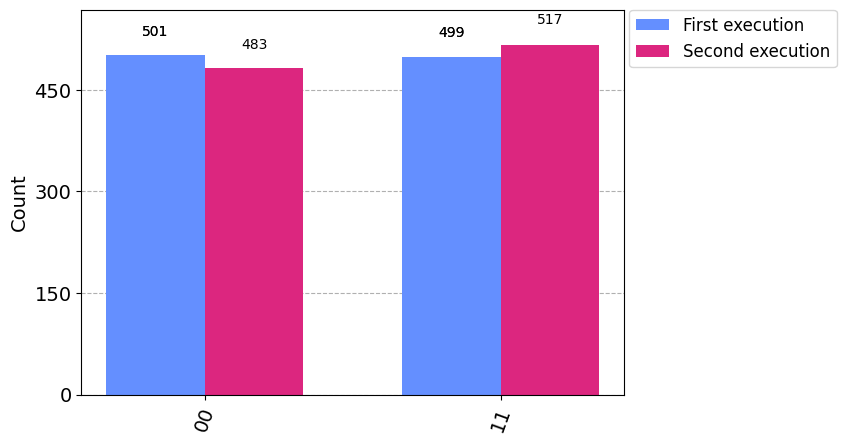

In [4]:
# Execute 2-qubit Bell state again
second_result = backend.run(transpile(circ, backend), shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)